# Deep Learning Algorithm 
We will conduct this research for the company Chipsoft. Chipsoft is an Amsterdam based software company which develops software for the healthcare sector. Chipsoft will deliver us a dataset from which we can derive information about patients during a surgery. The umbrella term PDMS will be used to refer to the data. PDMS stands for Patient Data Management System. 

## The research question will be:
##### How does the architecture of the Neural Network influence whether someone will end up at the intensive care unit or will have complications following surgery given their PDMS?

## Sub-questions:
### Theoretical:
    1. What is a patient data management system?
    2. How does a deep learning machine algorithm work?

### In Practice:
    1. Can we find correlations in the data that can give us useful insights?
    2. Can we provide the sergeants with insights derived from the data during the surgery





## Load in the Data
Our data is provided by Chipsoft. The data is a csv file which consists of the following columns:
    1. MeetTijd 
    2. HR (bpm) (Heartbeat)
    3. SpO2(%) (Oxygenation)
    4. NIBP(mmHg)
    5. IcNaOk


FileNotFoundError: [Errno 2] File /Users/jellewas/Documents/MachineLearning/pdmssetw.csv does not exist: '/Users/jellewas/Documents/MachineLearning/pdmssetw.csv'

In [33]:
df.dtypes

NameError: name 'df' is not defined

In [19]:
#Turn into discrete numerical values

#MeetTijd
#df['MeetTijd'] = pd.Categorical(df['MeetTijd'])
#df['MeetTijd'] = df['MeetTijd'].cat.codes
#HR(bpm)
#df['HR(bpm)'] = pd.Categorical(df['HR(bpm)'])
#df['HR(bpm)'] = df['HR(bpm)'].cat.codes
#SpO2(%)
#df['SpO2(%)'] = pd.Categorical(df['SpO2(%)'])
#df['SpO2(%)'] = df['SpO2(%)'].cat.codes
#NIBP(mmHg)
#df['NIBP(mmHg)'] = pd.Categorical(df['NIBP(mmHg)'])
#df['NIBP(mmHg)'] = df['NIBP(mmHg)'].cat.codes



## About the Deep Learning Algorithm
Tensorflow is a low-level deep learning framework. Keras is a frontend library that makes things a little easier to use. It implements most basic neural network architectures in a simple framework. Deep learning models are trained by gradient descent. These models are often so complex, that we don't want to have to work out the gradient ourselves. Keras and tensorflow allow the gradient to be computed automatically.


### Links:
1. https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

In [5]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/a6/b7/c0594c698c7149bfe738724ab9ab3722dca3a4a43823468fe9481abe4016/numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl
  Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf

In [20]:
#dataset = tf.data.Dataset.from_tensor_slices([df['MeetTijd'], df['HR(bpm)'], df['SpO2(%)'], df['NIBP(mmHg)'], df['IcNaOk']])
#dataset


In [2]:
import pandas as pd 
unpickled_df = pd.read_pickle("work_data.pk")
work_df = unpickled_df[['IcNaOk', 'Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']]

In [18]:
pip install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Input Variables
1. Length Meettijd
2. Percentage HR nan
3. Percentage SP02 nan
4. Percentage NBIP nan
5. Mean Hearth Rate
6. Standard Deviation Hearth Rate 
7. Max Hearth Rate
8. Min Hearth Rate

# Predict Variable
1. Will the Patient end up at the Intensive Care

In [20]:
work_df['IcNaOk'].value_counts()

0.0    5481
1.0     646
Name: IcNaOk, dtype: int64

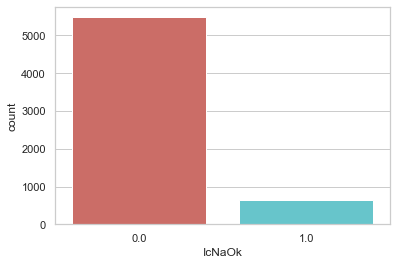

In [21]:
sns.countplot(x = 'IcNaOk', data = work_df, palette= 'hls')
plt.show()

In [22]:
work_df.groupby('IcNaOk').mean()

,Length_MeetTijd,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),Median HR(bpm)
IcNaOk,,,,,,
0.0,190.375296,70.344573,10.512798,120.077541,52.443897,68.880057
1.0,139.176471,80.019678,10.970599,123.453560,61.396285,77.914087


In [23]:

work_df.isna().sum()

IcNaOk             0
Length_MeetTijd    0
Mean HR(bpm)       0
Std HR(bpm)        0
Max HR(bpm)        0
Min HR(bpm)        0
Median HR(bpm)     0
dtype: int64

In [24]:
work_df

,IcNaOk,Length_MeetTijd,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),Median HR(bpm)
1,0.0,146,57.500000,24.779369,174.0,40.0,49.0
2,0.0,200,63.892500,7.198242,88.0,53.0,62.0
3,0.0,178,91.977528,12.881463,111.0,64.0,96.5
4,0.0,75,62.293333,6.050396,85.0,55.0,61.0
5,0.0,164,81.326220,8.733799,159.0,67.0,80.0
...,...,...,...,...,...,...,...
8327,1.0,126,66.238095,6.738221,86.0,54.0,65.0
8329,1.0,190,81.768421,12.354908,122.0,65.0,79.0
8331,1.0,177,71.553672,8.028107,101.0,57.0,71.0
8333,1.0,176,109.176136,11.665689,146.0,91.0,105.5


In [25]:
pip install sklearn.neighbors


  ERROR: Could not find a version that satisfies the requirement sklearn.neighbors (from versions: none)
ERROR: No matching distribution found for sklearn.neighbors
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import train_test_split

X, y = work_df[['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']], work_df['IcNaOk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (4288, 6)
Number transactions y_train dataset:  (4288,)
Number transactions X_test dataset:  (1839, 6)
Number transactions y_test dataset:  (1839,)


In [39]:
# logistic regression object 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      1652
         1.0       0.44      0.06      0.11       187

    accuracy                           0.90      1839
   macro avg       0.67      0.53      0.53      1839
weighted avg       0.86      0.90      0.86      1839



In [89]:
pip install imblearn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install scipy --upgrade

Requirement already up-to-date: scipy in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (1.6.1)
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# SMOTE
After SMOTE algorithm to oversample the data

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 459
Before OverSampling, counts of label '0': 3829 

After OverSampling, the shape of train_X: (7658, 6)
After OverSampling, the shape of train_y: (7658,) 

After OverSampling, counts of label '1': 3829
After OverSampling, counts of label '0': 3829


In [41]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83      1652
         1.0       0.24      0.72      0.36       187

    accuracy                           0.73      1839
   macro avg       0.60      0.73      0.59      1839
weighted avg       0.89      0.73      0.78      1839



array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(lr1, 20)
rfe = rfe.fit(X_train_res, y_train_res.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [32]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,X_train_res)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.629859
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.091      
Dependent Variable: y                AIC:              9724.4206  
Date:               2021-03-10 16:44 BIC:              9766.1223  
No. Observations:   7710             Log-Likelihood:   -4856.2    
Df Model:           5                LL-Null:          -5344.2    
Df Residuals:       7704             LLR p-value:      9.8705e-209
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Length_MeetTijd   -0.0044   0.0002 -18.4470 0.0000 -0.0048 -0.0039
Mean HR(bpm)       0.1937   0.0151  12.8692 0.0000  0

# Near-Miss Algorithm
Udersample minority class

In [33]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 433
Before Undersampling, counts of label '0': 3855 

After Undersampling, the shape of train_X: (866, 6)
After Undersampling, the shape of train_y: (866,) 

After Undersampling, counts of label '1': 433
After Undersampling, counts of label '0': 433


In [34]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       0.88      0.41      0.56      1626
         1.0       0.12      0.59      0.19       213

    accuracy                           0.43      1839
   macro avg       0.50      0.50      0.38      1839
weighted avg       0.79      0.43      0.52      1839



# RFE

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


[ True  True  True  True]
[1 1 1 1]


In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368036
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.093   
Dependent Variable: IcNaOk           AIC:              4515.9087
Date:               2021-03-11 09:42 BIC:              4536.0701
No. Observations:   6127             Log-Likelihood:   -2255.0  
Df Model:           2                LL-Null:          -2064.0  
Df Residuals:       6124             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Mean HR(bpm)     -0.0013   0.0144 -0.0897 0.9285 -0.0294  0.0269
Min HR(bpm)       0.0117   0.0042  2.7638 0.0057  0.0034  0.0200
Median HR(bpm

In [14]:
new_X = work_df[['Length_MeetTijd', 'Mean HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']]
new_X

,Length_MeetTijd,Mean HR(bpm),Max HR(bpm),Min HR(bpm),Median HR(bpm)
1,146,57.500000,174.0,40.0,49.0
2,200,63.892500,88.0,53.0,62.0
3,178,91.977528,111.0,64.0,96.5
4,75,62.293333,85.0,55.0,61.0
5,164,81.326220,159.0,67.0,80.0
...,...,...,...,...,...
8327,126,66.238095,86.0,54.0,65.0
8329,190,81.768421,122.0,65.0,79.0
8331,177,71.553672,101.0,57.0,71.0
8333,176,109.176136,146.0,91.0,105.5


In [39]:
logit_model2=sm.Logit(y,new_X)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.327641
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.027     
Dependent Variable: IcNaOk           AIC:              4024.9107 
Date:               2021-03-10 16:53 BIC:              4058.5130 
No. Observations:   6127             Log-Likelihood:   -2007.5   
Df Model:           4                LL-Null:          -2064.0   
Df Residuals:       6122             LLR p-value:      1.6577e-23
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Length_MeetTijd  -0.0084   0.0006 -14.2734 0.0000 -0.0096 -0.0073
Mean HR(bpm)      0.1319   0.0182   7.2445 0.0000  0.0963  0.1676


In [17]:
newest_model = new_X[['Mean HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']]
logit_model2=sm.Logit(y,newest_model)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.368036
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.093   
Dependent Variable: IcNaOk           AIC:              4515.9087
Date:               2021-03-11 09:43 BIC:              4536.0701
No. Observations:   6127             Log-Likelihood:   -2255.0  
Df Model:           2                LL-Null:          -2064.0  
Df Residuals:       6124             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Mean HR(bpm)     -0.0013   0.0144 -0.0897 0.9285 -0.0294  0.0269
Min HR(bpm)       0.0117   0.0042  2.7638 0.0057  0.0034  0.0200
Median HR(bpm

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(newest_model, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


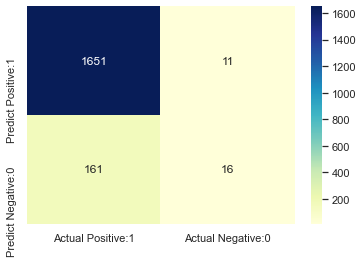

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.savefig('/Users/jellewas/Downloads/confusion_matrix')


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1662
         1.0       0.59      0.09      0.16       177

    accuracy                           0.91      1839
   macro avg       0.75      0.54      0.55      1839
weighted avg       0.88      0.91      0.87      1839



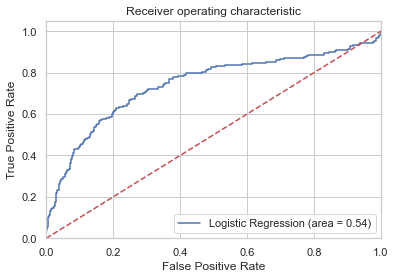

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('/Users/jellewas/Downloads/LR_best_model_Log_ROC')
plt.show()

# Work with Kaggle Notebook

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


#X = work_df[['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']]
#y = work_df['IcNaOk']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X_train_res, y_train_res)
# summarize the selection of the attributes
print('Selected features: %s' % list(X_train_res.columns[rfe.support_]))


Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']


Optimal number of features: 6
Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']


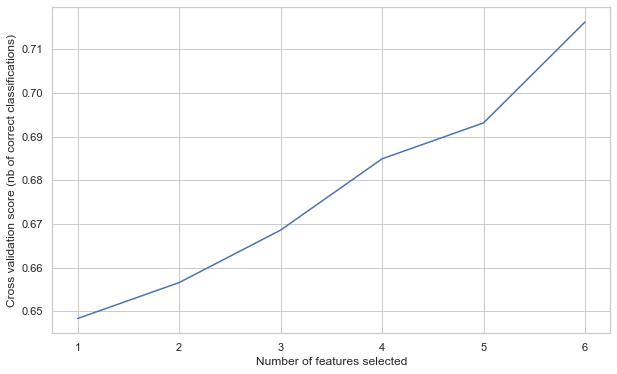

In [46]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train_res, y_train_res)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train_res.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig('/Users/jellewas/Downloads/RFE')
plt.show()

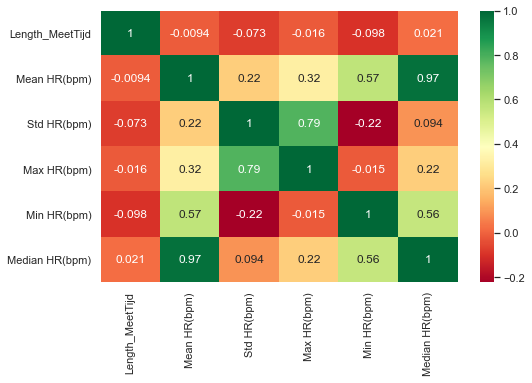

In [48]:
Selected_features = ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)']
X = work_df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.savefig('/Users/jellewas/Downloads/HeatMapRFE')
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.700
LogisticRegression log_loss is 0.605
LogisticRegression auc is 0.753


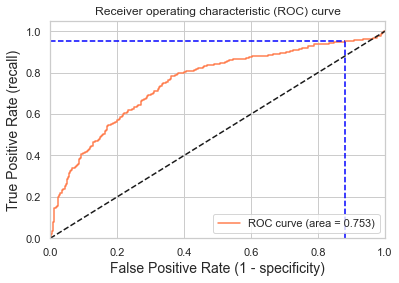

Using a threshold of 0.188 guarantees a sensitivity of 0.951 and a specificity of 0.119, i.e. a false positive rate of 88.11%.


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = work_df[Selected_features]
y = work_df['IcNaOk']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.savefig('/Users/jellewas/Downloads/ROCCruve_New')
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [52]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X_train_res, y_train_res, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train_res, y_train_res, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.716
LogisticRegression average log_loss is 0.590
LogisticRegression average auc is 0.767


In [19]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.895 (+/-0.004)
LogisticRegression average log_loss: 0.305 (+/-0.006)
LogisticRegression average auc: 0.720 (+/-0.016)


best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.8953811214534753


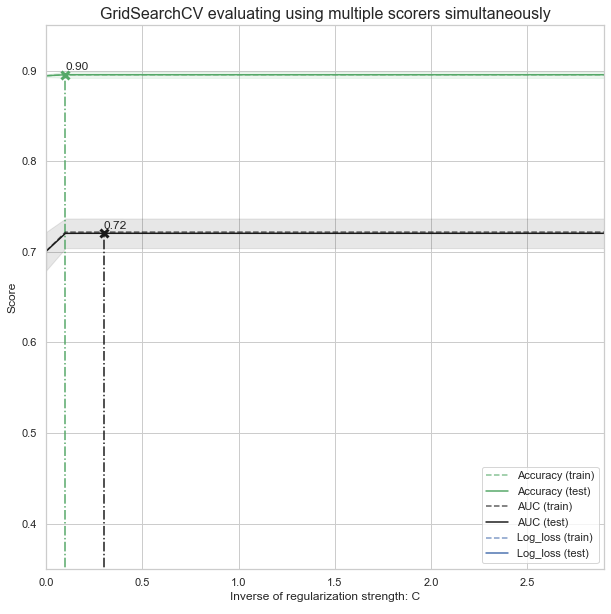

In [31]:
from sklearn.model_selection import GridSearchCV

X = work_df[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.savefig('/Users/jellewas/Downloads/GridSearch')
plt.show()

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 0.8946302227253053


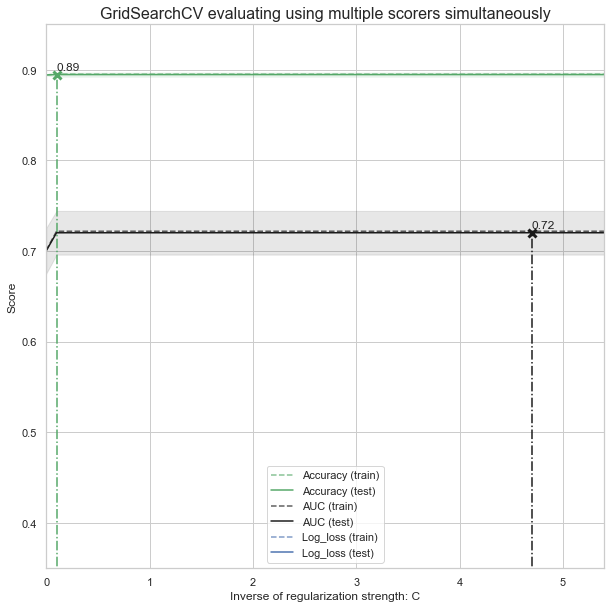

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# Near Miss new Data